chargement et traitement des donnees

In [117]:
import numpy as np
import pandas as pd

df= pd.read_csv('data_infarctus.csv', encoding="utf-8")

In [118]:
df.head(5)


,NUMERO,INFARCT,CO,TABAC,AGE,POIDS,TAILLE,ATCD,HTA
0,1,0,0,0,47,48.0,173,0.0,0
1,2,0,0,0,17,NaN,162,0.0,0
2,3,0,0,0,35,53.0,163,0.0,0
3,4,0,0,0,82,78.0,157,0.0,0
4,5,0,0,0,50,52.0,172,NaN,0


In [119]:
df.tail()

,NUMERO,INFARCT,CO,TABAC,AGE,POIDS,TAILLE,ATCD,HTA
444,445,1,1,2,31,67.0,162,1.0,0
445,446,1,1,2,30,80.0,154,1.0,0
446,447,1,1,2,42,67.0,167,1.0,1
447,448,1,1,2,35,52.0,172,1.0,1
448,449,1,1,2,49,85.0,170,1.0,1


In [120]:
df.shape

(449, 9)

In [121]:
df.describe()

,NUMERO,INFARCT,CO,TABAC,AGE,POIDS,TAILLE,ATCD,HTA
count,449.000000,449.000000,449.000000,449.000000,449.000000,437.000000,449.000000,442.000000,449.000000
mean,225.000000,0.331849,0.445434,0.741648,45.619154,66.066362,165.160356,0.119910,0.354120
std,129.759393,0.471402,0.497568,0.796240,16.166397,17.962057,8.105671,0.325224,0.478779
min,1.000000,0.000000,0.000000,0.000000,15.000000,33.000000,138.000000,0.000000,0.000000
25%,113.000000,0.000000,0.000000,0.000000,33.000000,51.000000,160.000000,0.000000,0.000000
50%,225.000000,0.000000,0.000000,1.000000,44.000000,64.000000,166.000000,0.000000,0.000000
75%,337.000000,1.000000,1.000000,1.000000,56.000000,79.000000,171.000000,0.000000,1.000000
max,449.000000,1.000000,1.000000,2.000000,100.000000,128.000000,184.000000,1.000000,1.000000


In [122]:
df.isnull()

,NUMERO,INFARCT,CO,TABAC,AGE,POIDS,TAILLE,ATCD,HTA
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
444,False,False,False,False,False,False,False,False,False
445,False,False,False,False,False,False,False,False,False
446,False,False,False,False,False,False,False,False,False
447,False,False,False,False,False,False,False,False,False


In [123]:
df.drop('NUMERO', axis=1, inplace=True)

In [124]:
df.head()

,INFARCT,CO,TABAC,AGE,POIDS,TAILLE,ATCD,HTA
0,0,0,0,47,48.0,173,0.0,0
1,0,0,0,17,NaN,162,0.0,0
2,0,0,0,35,53.0,163,0.0,0
3,0,0,0,82,78.0,157,0.0,0
4,0,0,0,50,52.0,172,NaN,0


In [125]:
#eleminer le NaN de notre dataset
df.fillna(df.mean(), inplace=True)
print(df.head())

   INFARCT  CO  TABAC  AGE      POIDS  TAILLE     ATCD  HTA
0        0   0      0   47  48.000000     173  0.00000    0
1        0   0      0   17  66.066362     162  0.00000    0
2        0   0      0   35  53.000000     163  0.00000    0
3        0   0      0   82  78.000000     157  0.00000    0
4        0   0      0   50  52.000000     172  0.11991    0


Exploration des donnees

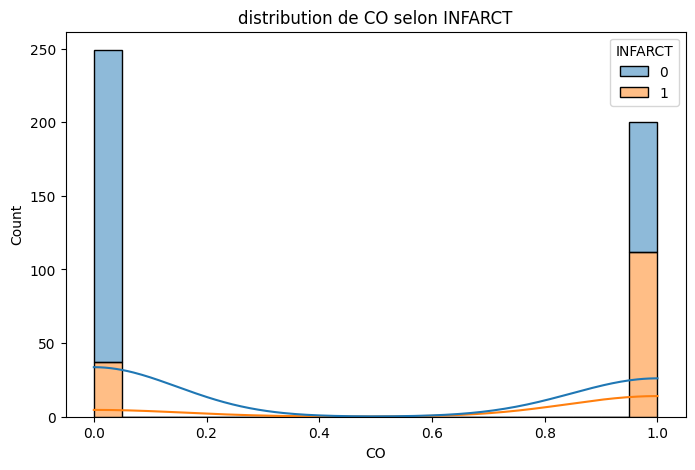

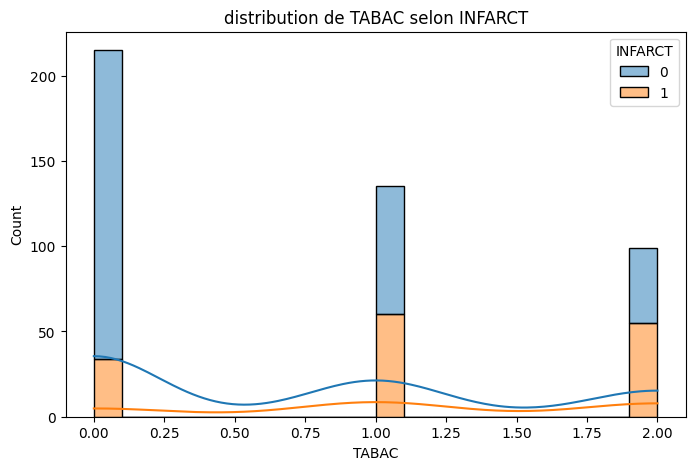

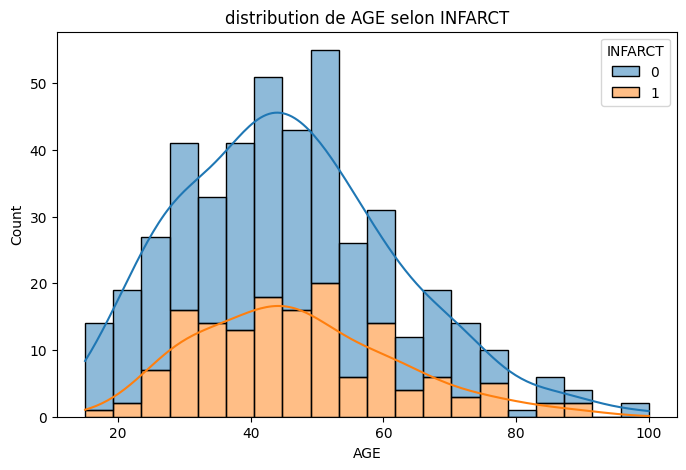

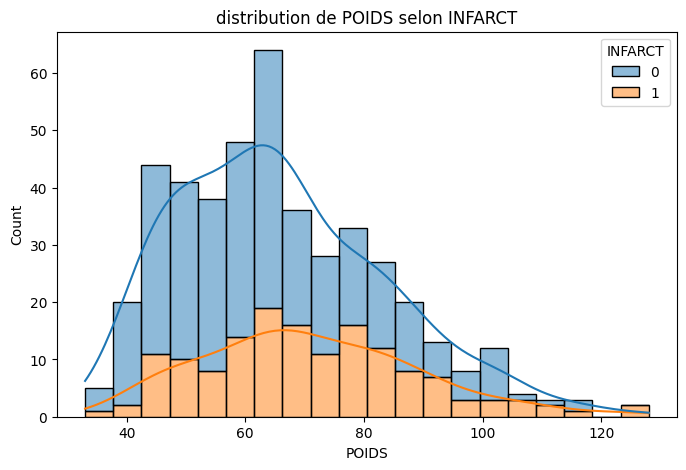

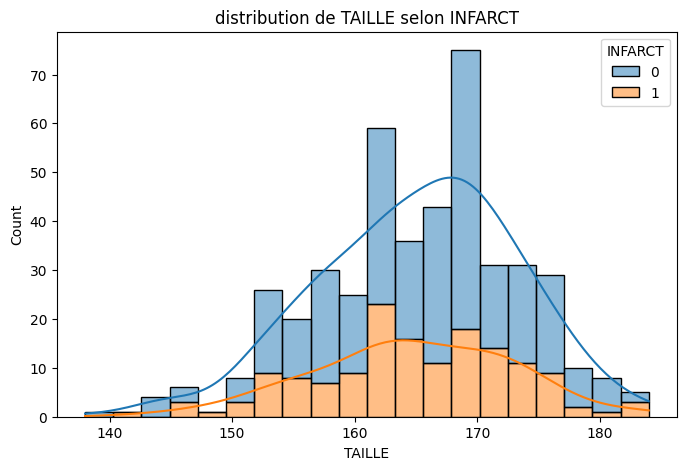

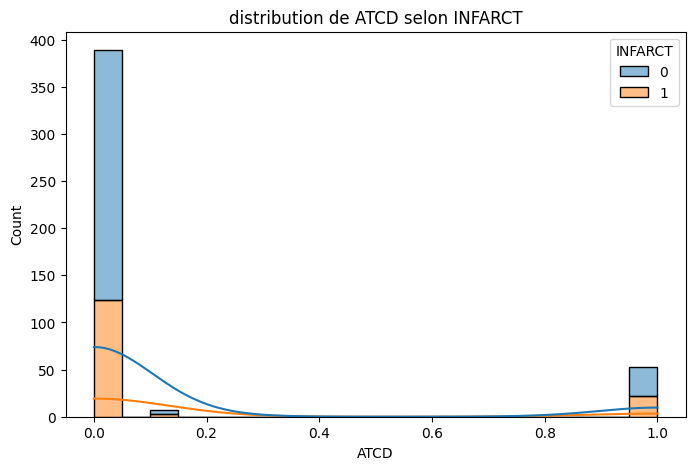

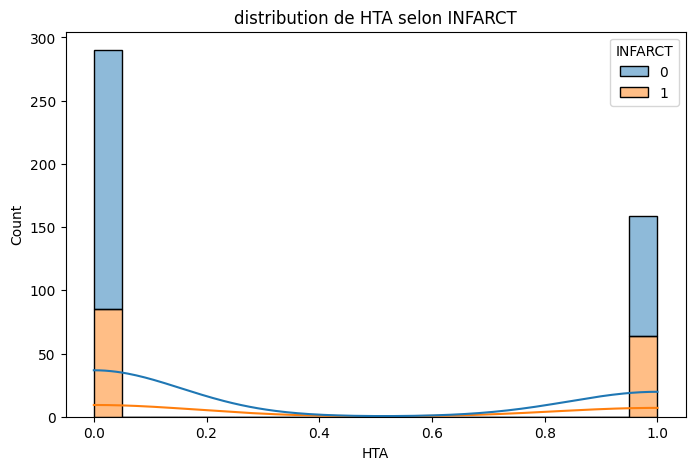

In [126]:
#histogramme d'infarctus par rapport aux autres
import matplotlib.pyplot as plt
import seaborn as sns

target_var = 'INFARCT' #variable cible
#pour chaque variable numerique (sauf notre variable cible), afficher un histogramme groupe par infarctus
for col in df.columns:
  if col != target_var and pd.api.types.is_numeric_dtype(df[col]):
   plt.figure(figsize=(8, 5))
   sns.histplot(data=df, x=col, hue=target_var, kde=True, bins=20, multiple='stack')
   plt.title(f'distribution de {col} selon {target_var}')
  plt.show()

In [127]:
#remplacons 0 et 1 par non et oui
df['INFARCT']=df['INFARCT'].replace({0: 'non', 1: 'oui'})

In [128]:
df

,INFARCT,CO,TABAC,AGE,POIDS,TAILLE,ATCD,HTA
0,non,0,0,47,48.000000,173,0.00000,0
1,non,0,0,17,66.066362,162,0.00000,0
2,non,0,0,35,53.000000,163,0.00000,0
3,non,0,0,82,78.000000,157,0.00000,0
4,non,0,0,50,52.000000,172,0.11991,0
...,...,...,...,...,...,...,...,...
444,oui,1,2,31,67.000000,162,1.00000,0
445,oui,1,2,30,80.000000,154,1.00000,0
446,oui,1,2,42,67.000000,167,1.00000,1
447,oui,1,2,35,52.000000,172,1.00000,1


In [129]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   INFARCT  449 non-null    object 
 1   CO       449 non-null    int64  
 2   TABAC    449 non-null    int64  
 3   AGE      449 non-null    int64  
 4   POIDS    449 non-null    float64
 5   TAILLE   449 non-null    int64  
 6   ATCD     449 non-null    float64
 7   HTA      449 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 28.2+ KB


In [130]:
#correlation entre la variable infarct et les autres avec le point biserial correlation
from scipy.stats import pointbiserialr

for col in df.columns:
    if col != 'INFARCT' and pd.api.types.is_numeric_dtype(df[col]):
        coef, p_value = pointbiserialr(df['INFARCT'].replace({'non': 0, 'oui': 1}), df[col])
        print(f"Corrélation point-biserial entre INFARCT et {col} : {coef:.3f} (p-value={p_value:.3f})")



Corrélation point-biserial entre INFARCT et CO : 0.434 (p-value=0.000)
Corrélation point-biserial entre INFARCT et TABAC : 0.354 (p-value=0.000)
Corrélation point-biserial entre INFARCT et AGE : 0.057 (p-value=0.225)
Corrélation point-biserial entre INFARCT et POIDS : 0.199 (p-value=0.000)
Corrélation point-biserial entre INFARCT et TAILLE : -0.034 (p-value=0.475)
Corrélation point-biserial entre INFARCT et ATCD : 0.066 (p-value=0.163)
Corrélation point-biserial entre INFARCT et HTA : 0.111 (p-value=0.019)


<ipython-input-130-e0679d1b6af8>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  coef, p_value = pointbiserialr(df['INFARCT'].replace({'non': 0, 'oui': 1}), df[col])


In [131]:
#comparaison des moyennes
from scipy.stats import ttest_ind

for col in df.columns:
  if col != 'INFARCT' and pd.api.types.is_numeric_dtype(df[col]):
    group_yes = df[df['INFARCT'] == 'oui'][col]
    group_no = df[df['INFARCT'] == 'non'][col]
    stat, p =ttest_ind(group_yes, group_no)
    print(f"T-test {col}: stat={stat:.2f}, p-value={p:.3f}")



T-test CO: stat=10.19, p-value=0.000
T-test TABAC: stat=8.00, p-value=0.000
T-test AGE: stat=1.21, p-value=0.225
T-test POIDS: stat=4.30, p-value=0.000
T-test TAILLE: stat=-0.72, p-value=0.475
T-test ATCD: stat=1.40, p-value=0.163
T-test HTA: stat=2.36, p-value=0.019


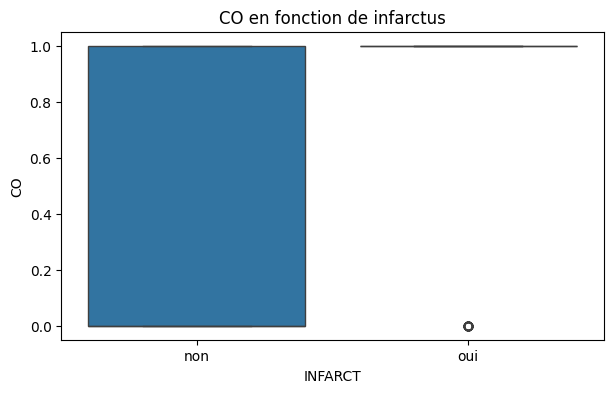

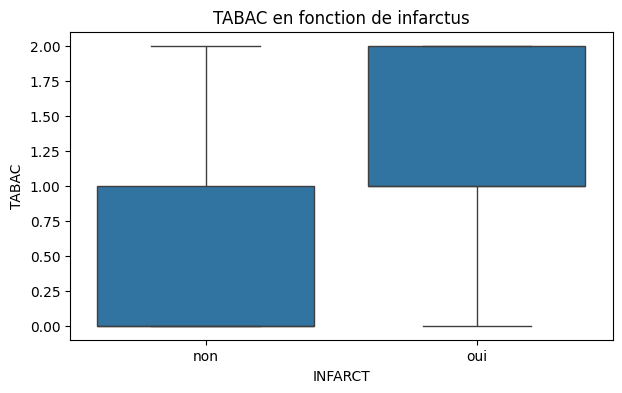

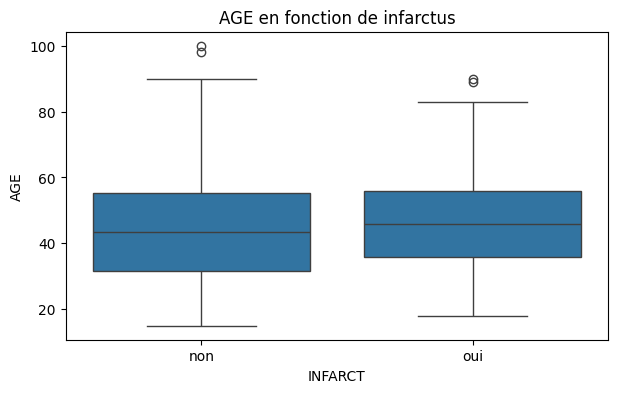

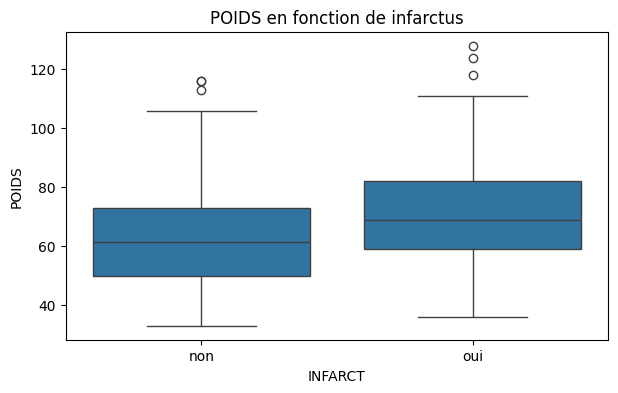

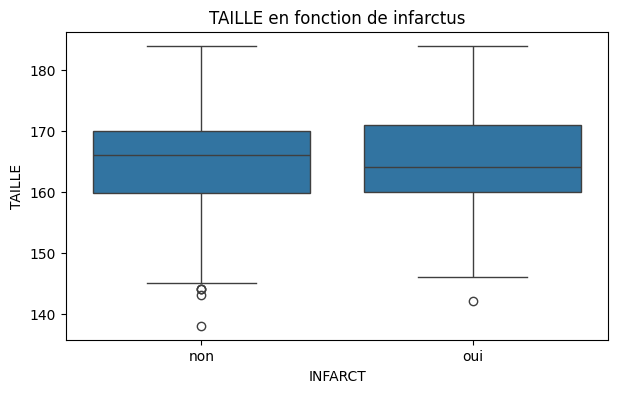

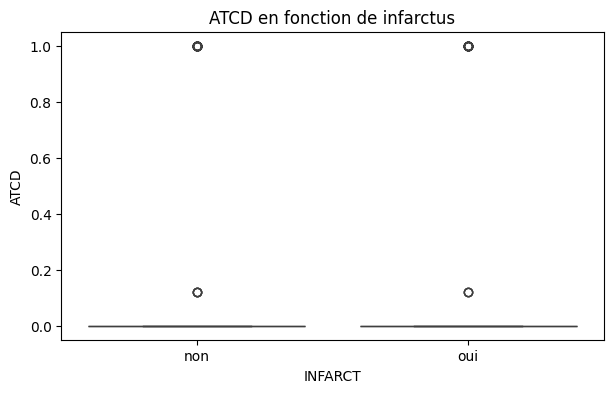

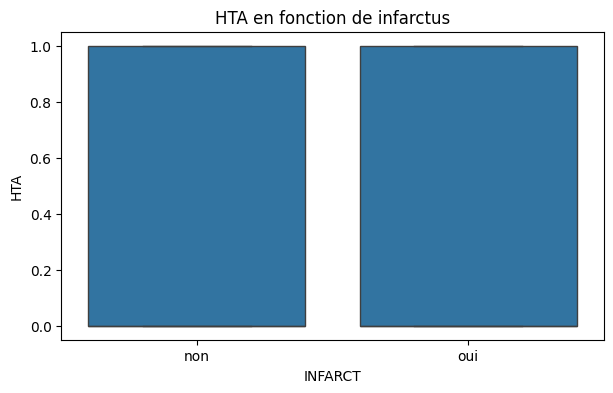

In [132]:
import seaborn as sns

for col in df.columns:
  if col != 'INFARCT' and pd.api.types.is_numeric_dtype(df[col]):
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='INFARCT', y=col, data=df)
    plt.title(f'{col} en fonction de infarctus')
    plt.show()



entrainement et evaluation du modele

regression logistique

Accuracy : 0.8111
Matrice de confusion :
 [[57  6]
 [11 16]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        63
           1       0.73      0.59      0.65        27

    accuracy                           0.81        90
   macro avg       0.78      0.75      0.76        90
weighted avg       0.80      0.81      0.81        90

  Variable  Coefficient
0       CO     2.283462
1    TABAC     1.203675
6      HTA     0.561860
5     ATCD     0.388945
2      AGE     0.044917
3    POIDS     0.013261
4   TAILLE    -0.003375


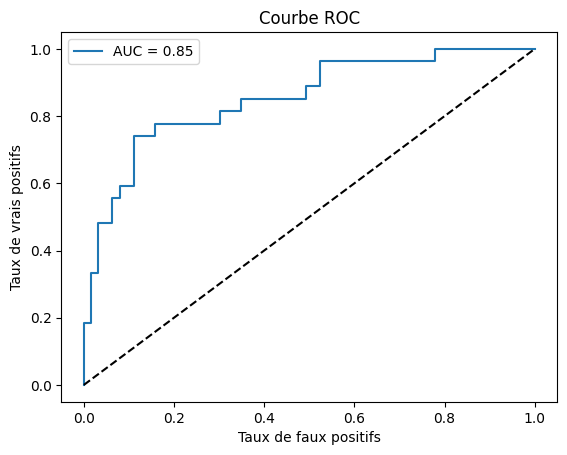

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns



# 2. Remplacer les modalités textuelles par des nombres si nécessaire
df['INFARCT'] = df['INFARCT'].replace({'non': 0, 'oui': 1})
df['CO'] = df['CO'].replace({'non': 0, 'oui': 1})
df['TABAC'] = df['TABAC'].replace({'non': 0, 'oui': 1})
df['ATCD'] = df['ATCD'].replace({'non': 0, 'oui': 1})
df['HTA'] = df['HTA'].replace({'non': 0, 'oui': 1})

# 3. Séparer les variables explicatives et la cible
X = df[['CO', 'TABAC', 'AGE', 'POIDS', 'TAILLE', 'ATCD', 'HTA']]
# X = df.drop('INFARCT', axis=1)
y = df['INFARCT']

# 4. Découper en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entraîner le modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. Évaluer le modèle
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.4f}")
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("Rapport de classification :\n", classification_report(y_test, y_pred))

# 7. Importance des variables (coefficients)
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(coefficients)

# 8. Courbe ROC et AUC
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()

In [145]:
# 9. Demander à l'utilisateur d'entrer ses propres valeurs
def user_input():
    print("\n🔍 Veuillez entrer les valeurs suivantes pour prédire le risque d'infarctus :\n")

    def get_binary_input(prompt):
        """Fonction pour s'assurer que l'utilisateur entre 'oui' ou 'non' uniquement."""
        while True:
            value = input(prompt).strip().lower()
            if value in ["oui", "non"]:
                return 1 if value == "oui" else 0
            else:
                print("⚠️ Erreur : Veuillez entrer 'oui' ou 'non' uniquement.")

    def get_float_input(prompt):
        """Fonction pour s'assurer que l'utilisateur entre un nombre valide."""
        while True:
            try:
                return float(input(prompt).strip())
            except ValueError:
                print("⚠️ Erreur : Veuillez entrer un nombre valide.")

    # Saisie des données avec contrôle
    co = get_binary_input("CO (oui/non) : ")
    tabac = get_binary_input("Tabac (oui/non) : ")
    age = get_float_input("Âge : ")
    poids = get_float_input("Poids : ")
    taille = get_float_input("Taille (en cm) : ")
    atcd = get_binary_input("Antécédent (oui/non) : ")
    hta = get_binary_input("Hypertension artérielle (oui/non) : ")

    # Créer un DataFrame avec ces valeurs
    user_data = pd.DataFrame([[co, tabac, age, poids, taille, atcd, hta]], columns=X.columns)

    # Faire une prédiction
    prediction = model.predict(user_data)[0]

    # Afficher la prédiction
    print("\n🔎 Résultat de l'analyse :")
    if prediction == 1:
        print("⚠️ Le risque d'infarctus est ÉLEVÉ (prédiction : 1).")
    else:
        print("✅ Le risque d'infarctus est FAIBLE (prédiction : 0).")

# Appeler la fonction pour que l'utilisateur puisse entrer ses valeurs
user_input()



🔍 Veuillez entrer les valeurs suivantes pour prédire le risque d'infarctus :

CO (oui/non) : oui
Tabac (oui/non) : oui
Âge : 50
Poids : 68
Taille (en cm) : 176
Antécédent (oui/non) : non
Hypertension artérielle (oui/non) : oui

🔎 Résultat de l'analyse :
⚠️ Le risque d'infarctus est ÉLEVÉ (prédiction : 1).


random forest

Accuracy : 0.7888888888888889
Matrice de confusion :
 [[56  7]
 [12 15]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.82      0.89      0.85        63
           1       0.68      0.56      0.61        27

    accuracy                           0.79        90
   macro avg       0.75      0.72      0.73        90
weighted avg       0.78      0.79      0.78        90

  Variable  Importance
0       CO    0.230632
2      AGE    0.211417
3    POIDS    0.196381
4   TAILLE    0.147662
1    TABAC    0.145960
6      HTA    0.044162
5     ATCD    0.023785


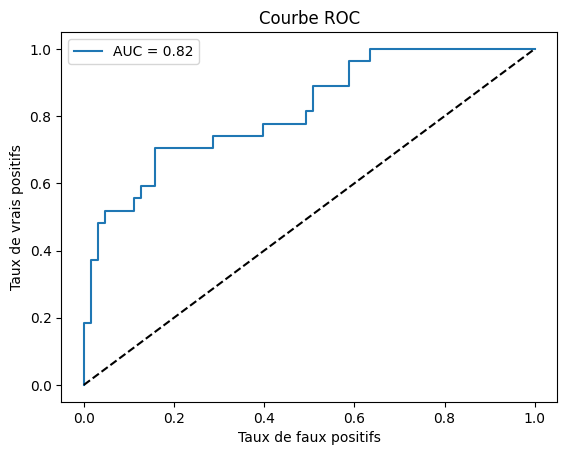

In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Remplacer les modalités textuelles par des nombres si nécessaire
df['INFARCT'] = df['INFARCT'].replace({'non': 0, 'oui': 1})
df['CO'] = df['CO'].replace({'non': 0, 'oui': 1})
df['TABAC'] = df['TABAC'].replace({'non': 0, 'oui': 1})
df['ATCD'] = df['ATCD'].replace({'non': 0, 'oui': 1})
df['HTA'] = df['HTA'].replace({'non': 0, 'oui': 1})

# 3. Séparer les variables explicatives et la cible
# X = df[['CO', 'TABAC', 'AGE', 'POIDS', 'TAILLE', 'ATCD', 'HTA']]
# # X = df.drop('INFARCT', axis=1)
# y = df['INFARCT']

# 3. Séparer les variables explicatives et la cible
X = df.drop('INFARCT', axis=1)
y = df['INFARCT']

# 4. Découper en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entraîner le modèle Random Forest avec ajustement des hyperparamètres et équilibrage des classes
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=10, min_samples_split=4)
model.fit(X_train, y_train)

# 6. Évaluer le modèle
y_pred = model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("Rapport de classification :\n", classification_report(y_test, y_pred))

# 7. Importance des variables (feature importances)
importances = pd.DataFrame({
    'Variable': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importances)

# 8. Courbe ROC et AUC
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()




In [147]:
# 9. Demander à l'utilisateur d'entrer ses propres valeurs
def user_input():
    print("\n🔍 Veuillez entrer les valeurs suivantes pour prédire le risque d'infarctus :\n")

    def get_binary_input(prompt):
        """Fonction pour s'assurer que l'utilisateur entre 'oui' ou 'non' uniquement."""
        while True:
            value = input(prompt).strip().lower()
            if value in ["oui", "non"]:
                return 1 if value == "oui" else 0
            else:
                print("⚠️ Erreur : Veuillez entrer 'oui' ou 'non' uniquement.")

    def get_float_input(prompt):
        """Fonction pour s'assurer que l'utilisateur entre un nombre valide."""
        while True:
            try:
                return float(input(prompt).strip())
            except ValueError:
                print("⚠️ Erreur : Veuillez entrer un nombre valide.")

    # Saisie des données avec contrôle
    co = get_binary_input("CO (oui/non) : ")
    tabac = get_binary_input("Tabac (oui/non) : ")
    age = get_float_input("Âge : ")
    poids = get_float_input("Poids : ")
    taille = get_float_input("Taille (en cm) : ")
    atcd = get_binary_input("Antécédent (oui/non) : ")
    hta = get_binary_input("Hypertension artérielle (oui/non) : ")

    # Créer un DataFrame avec ces valeurs
    user_data = pd.DataFrame([[co, tabac, age, poids, taille, atcd, hta]], columns=X.columns)

    # Faire une prédiction
    prediction = model.predict(user_data)[0]

    # Afficher la prédiction
    print("\n🔎 Résultat de l'analyse :")
    if prediction == 1:
        print("⚠️ Le risque d'infarctus est ÉLEVÉ (prédiction : 1).")
    else:
        print("✅ Le risque d'infarctus est FAIBLE (prédiction : 0).")

# Appeler la fonction pour que l'utilisateur puisse entrer ses valeurs
user_input()



🔍 Veuillez entrer les valeurs suivantes pour prédire le risque d'infarctus :

CO (oui/non) : non
Tabac (oui/non) : non
Âge : 47
Poids : 48
Taille (en cm) : 173
Antécédent (oui/non) : non
Hypertension artérielle (oui/non) : non

🔎 Résultat de l'analyse :
✅ Le risque d'infarctus est FAIBLE (prédiction : 0).
